# TP8 : Prédictions sur le dataset reuters avec un RNN

**Brahim ALAOUI**

**Master : BIBDA**


Appliquer le modèle RNN sur la dataset reuters.

* Elle contient 11 228 articles de presse provenant de Reuters.
* Réparties en 46 catégories (finance, commerce, etc.).
* A importer en utilisant : 
from tensorflow.keras.datasets import reuters


## PARTIES 1

### 1.	Chargement des données (Importation):

**Importation des Bibliothèques**

In [15]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

**Configuration des Paramètres**

max_features : Limite le nombre de mots uniques utilisés dans le jeu de données à 10 000.

maxlen : Limite la longueur maximale des séquences de texte à 500 mots (les séquences plus longues seront tronquées et les plus courtes seront complétées par du padding)

In [23]:
max_features = 10000  # Nombre maximal de mots uniques
maxlen = 500  # Longueur maximale des séquence

**Chargement des Données**

In [26]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


**Prétraitement des Données**

In [41]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

**Afficher quelques exemples de données pour comprendre la structure**

In [32]:
# Afficher un exemple de séquence et son label
print(f"Exemple de séquence (train): {x_train[0]}")
print(f"Label associé (train): {y_train[0]}")

# Afficher la taille des données
print(f"Nombre de séquences d'entraînement: {len(x_train)}")
print(f"Nombre de séquences de test: {len(x_test)}")

Exemple de séquence (train): [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0   

## PARTIES 2

### 2. Construction du Modèle RNN

**Créer une instance du modèle Sequential**

Le modèle Sequential permet d'empiler les couches une par une.

In [37]:
model = Sequential()

**Ajouter une couche Embedding**

La couche Embedding sert à transformer les entiers représentant les mots en vecteurs continus de taille fixe. Cette couche est généralement utilisée au début pour représenter les mots.

**Ajouter une couche SimpleRNN**

La couche SimpleRNN est utilisée pour traiter les séquences d'entrée.

**Ajouter une couche Dense**

La couche Dense est utilisée pour la classification. Ici, nous utiliserons softmax comme fonction d'activation car le problème de classification est multi-classes (46 classes pour Reuters).

In [44]:
embedding_dim = 128  # Taille des vecteurs d'embedding
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model.add(SimpleRNN(units=128))
model.add(Dense(46, activation='softmax'))

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## PARTIES 3

### 3. Compilation du Modèle

Utiliser model.compile avec optimizer, loss et metrics.

Optimizer : adam

Loss : sparse_categorical_crossentropy est utilisée pour les problèmes de classification multi-classes où les labels sont des entiers (non one-hot encoded).

Metrics : accuracy

In [51]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


## PARTIES 4 

### 4. Entraînement du Modèle


**Utilisation de model.fit pour l'entraînement**

Nous allons entraîner le modèle avec les paramètres suivants :

Époques : 10

Batch Size : 32

Validation : 20% des données d'entraînement seront utilisées pour la validation.

In [58]:
# Entraînement du modèle
history = model.fit(
    x_train, 
    y_train, 
    epochs=10,  # Nombre d'époques
    batch_size=32,  # Taille des batches
    validation_split=0.2  # Utiliser 20% des données d'entraînement pour la validation
)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.3479 - loss: 2.5709 - val_accuracy: 0.3918 - val_loss: 2.2120
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.4482 - loss: 2.1423 - val_accuracy: 0.3450 - val_loss: 2.4091
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.3866 - loss: 2.3005 - val_accuracy: 0.4775 - val_loss: 2.0083
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.5035 - loss: 1.8849 - val_accuracy: 0.4914 - val_loss: 2.0407
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.5289 - loss: 1.8106 - val_accuracy: 0.4908 - val_loss: 1.9972
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.5665 - loss: 1.6791 - val_accuracy: 0.4452 - val_loss: 2.0217
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 26s 114ms/step - accuracy: 0.4819 - loss: 2.0327 - val_accuracy: 0.4263 - val_loss: 2.1552
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 26s 116ms/step - accuracy: 0.5080 - loss: 1.

## PARTIES 5

### 5. Évaluation du Modèle

**Évaluation sur les Données de Test**

Utilisons model.evaluate() pour obtenir la perte et la précision sur le jeu de données de test.

In [64]:
# Évaluation sur les données de test
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Afficher les résultats
print(f"Perte (loss) sur les données de test: {test_loss}")
print(f"Précision (accuracy) sur les données de test: {test_accuracy}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.4977 - loss: 1.9583
Perte (loss) sur les données de test: 1.9819995164871216
Précision (accuracy) sur les données de test: 0.4982190430164337


## PARTIES 6

### 6. Visualisation des Résultats

**Visualisation des Courbes de Perte loss**

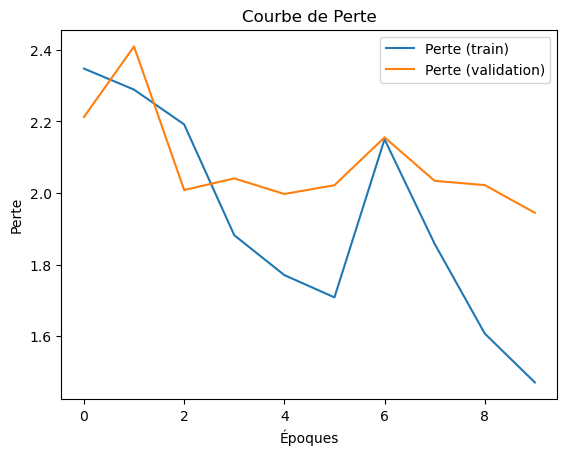

In [69]:
# Tracer les courbes de perte (loss)
plt.plot(history.history['loss'], label='Perte (train)')
plt.plot(history.history['val_loss'], label='Perte (validation)')
plt.title('Courbe de Perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

**Visualisation des Courbes de Précision accuracy**

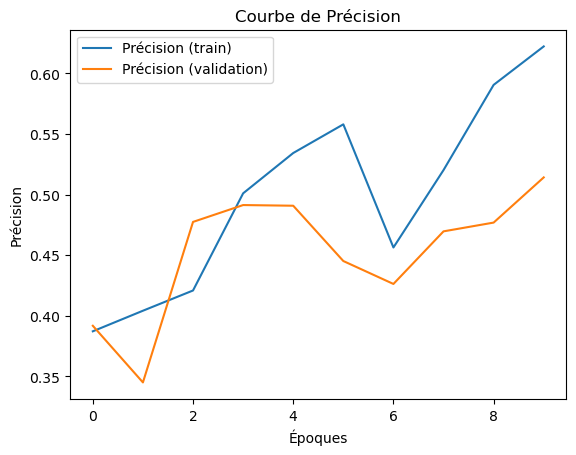

In [72]:
# Tracer les courbes de précision (accuracy)
plt.plot(history.history['accuracy'], label='Précision (train)')
plt.plot(history.history['val_accuracy'], label='Précision (validation)')
plt.title('Courbe de Précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()

## PARTIES 7

### 7. Prédictions

Utilisation de model.predict pour faire des prédictions sur les données de test

In [77]:
# Faire des prédictions sur les données de test
y_pred = model.predict(x_test)

# Trouver la classe prédite pour chaque exemple
y_pred_classes = y_pred.argmax(axis=1)

# Afficher quelques exemples de prédictions et leurs vraies classes
for i in range(10):
    print(f"Exemple {i+1}:")
    print(f"Prédiction: {y_pred_classes[i]}, Vraie classe: {y_test[i]}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step
Exemple 1:
Prédiction: 19, Vraie classe: 3
Exemple 2:
Prédiction: 19, Vraie classe: 10
Exemple 3:
Prédiction: 4, Vraie classe: 1
Exemple 4:
Prédiction: 4, Vraie classe: 4
Exemple 5:
Prédiction: 1, Vraie classe: 4
Exemple 6:
Prédiction: 3, Vraie classe: 3
Exemple 7:
Prédiction: 4, Vraie classe: 3
Exemple 8:
Prédiction: 3, Vraie classe: 3
Exemple 9:
Prédiction: 3, Vraie classe: 3
Exemple 10:
Prédiction: 4, Vraie classe: 3


##  Évaluer la Précision et Afficher une Matrice de Confusion

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

Précision sur les données de test : 0.4982190560997329


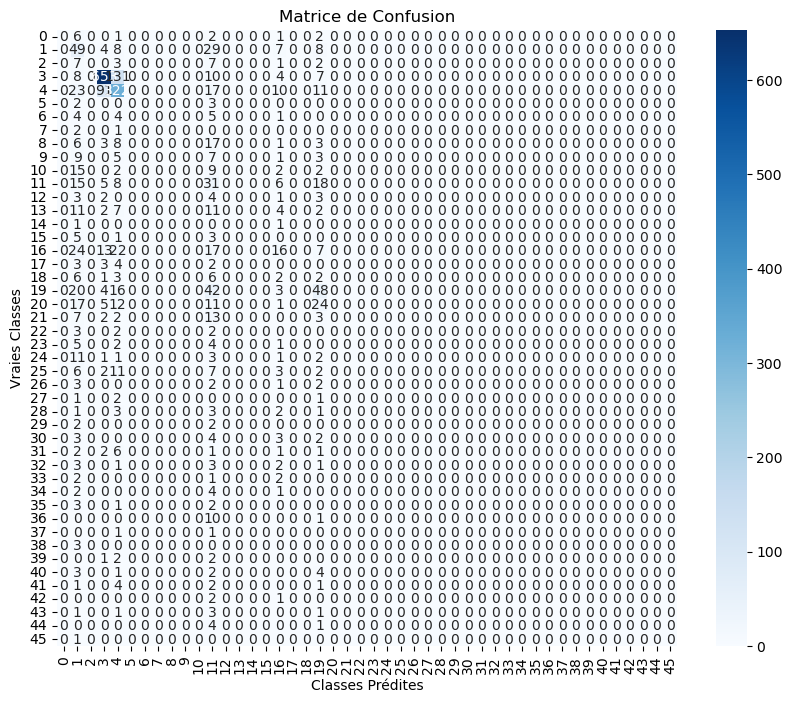

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Précision sur les données de test : {accuracy}")

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualisation de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(46), yticklabels=range(46))
plt.title('Matrice de Confusion')
plt.xlabel('Classes Prédites')
plt.ylabel('Vraies Classes')
plt.show()


## Fin MERCI 

**BRAHIM ALAOUI**

**MASTER : BIBDA**

brahimalaoui0216.gmail.com